In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [81]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6

### ACF and PACF 

In [272]:
import warnings 
warnings.filterwarnings('ignore')

In [273]:
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf

Build an autocovariance formula for 1-D. For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac {1}{n} \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$


In [274]:
sample_df = pd.DataFrame({'a': [13, 5, 11, 12, 9]})

aucovs = []
mean = sample_df.mean()
for i in range(len(sample_df)):
    gamma_i = np.nansum((sample_df.a - mean[0]) * (sample_df.a - mean[0]).shift(i))
    gamma_i /= len(sample_df)
    aucovs.append(gamma_i)

In [275]:
aucovs

[8.0, -4.0, -1.6, 2.2, -0.6]

An unbiased autocovariance can be obtained if we divide each sum by $n-k$ instead of $n$.

The autocorrelation for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

In [276]:
acf = []

for i in range(len(sample_df)):
    gamma_i = np.nansum((sample_df.a - mean[0]) * (sample_df.a - mean[0]).shift(i))
    gamma_i /= sum((sample_df.a - mean[0])**2)
    acf.append(gamma_i)
    
acf    

[1.0, -0.5, -0.2, 0.275, -0.075]

Alternatively, we can get those variables from the built-in libraries in statsmodels.

In [277]:
from statsmodels.tsa.stattools import acf, acovf, pacf_yw, pacf_ols

acf(sample_df.a)

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [278]:
acovf(sample_df.a)

array([ 8. , -4. , -1.6,  2.2, -0.6])

Find partial autocorrelation with maximum likelihood estimation and unbiased method by the Yule-Walker equations.

In [279]:
pacf_yw(sample_df.a, nlags=4, method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [280]:
pacf_yw(sample_df.a, nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

Find partial autocorrelations with ordinary least squares instead of the Yule-Walker equations.

In [281]:
pacf_ols(sample_df.a, nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

Import a non-stationary and stationary dataset and get their lag, acf and pacf plots.

In [313]:
# non-stationary
df = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/airline_passengers.csv', index_col=0, parse_dates=True) 
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

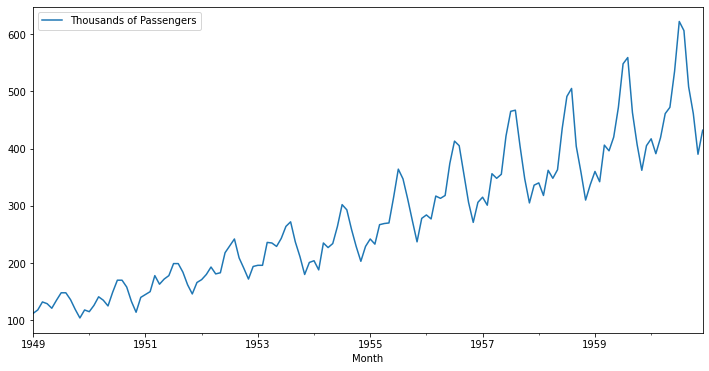

In [283]:
df.plot()

In [284]:
# a stationary dataset
df2 = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/DailyTotalFemaleBirths.csv', index_col=0, parse_dates=True) 
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


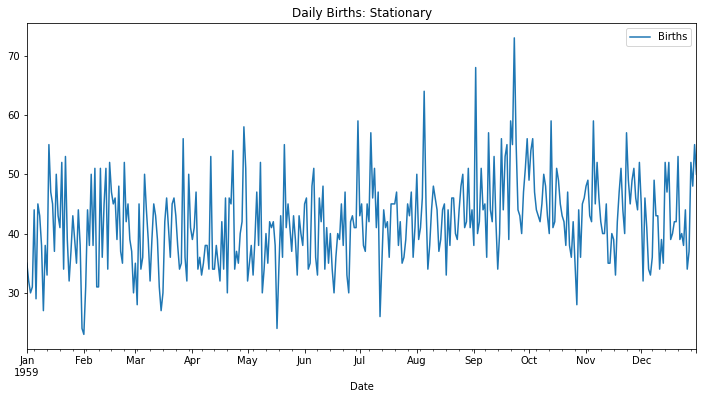

In [285]:
df2.plot(title='Daily Births: Stationary');

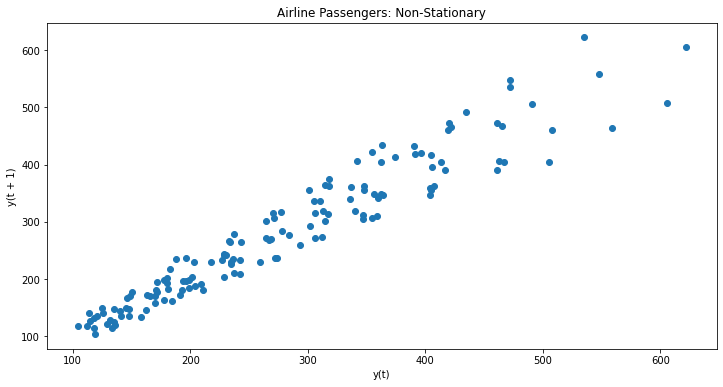

In [286]:
from pandas.plotting import lag_plot
ax = lag_plot(df)
ax.set_title('Airline Passengers: Non-Stationary');

Airline passsenger numbers have a positive correlations with lag values as expected since there is a trend and seasonality in the dataset.

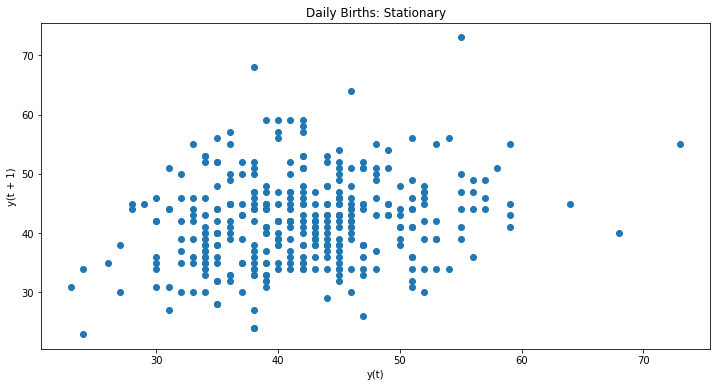

In [287]:
ax = lag_plot(df2)
ax.set_title('Daily Births: Stationary');

Daily birth values seem to be distributed randomly rather than having a dependence on the previous values. <br><br>
###### ACF Plots

Autocorrelation is the relation between the current value and the lagged value in a given number of units.

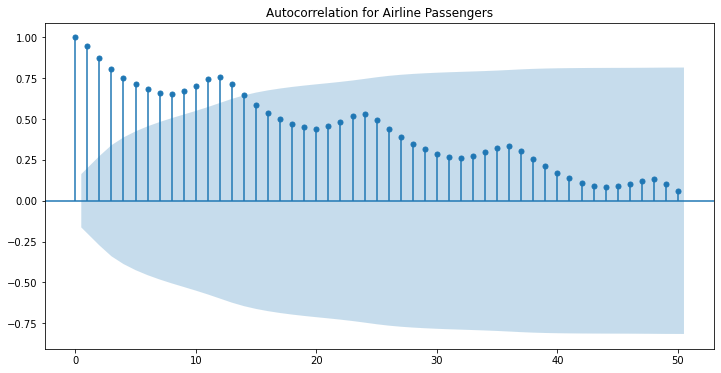

In [288]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=50, title='Autocorrelation for Airline Passengers');

We notice that the correlation between lag values is still remarkable even up to the ~15 lag values, and the autocorrelation appear to behave in a similar fashion in every 12 lags which is expected as airline passenger values tend to have a seasonality in each distinct year. Note that the shaded blue area indicates the confidence interval, in which the autocorrelation values are regarded as insignificant.

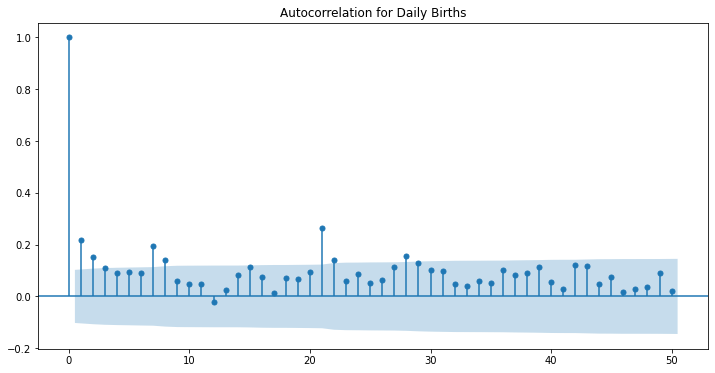

In [289]:
plot_acf(df2, lags=50, title='Autocorrelation for Daily Births');

A huge drop-off in autocorrelation since the first lag is typical in stationary datasets, and most autocorrelation values appear to be in the confidence interval, meaning there is hardly any statistical significance. <br> <br>

###### PACF Plots

Partial autocorrelation function (PACF) at lag $k$ is the correlation between $x_t$ and $x_{t-k}$ with the correlations effects coming from the elements up to $x_{t-k-1}$ removed. This definiton also implies that PACF at lag 1 is simply equals to autocorrelation.

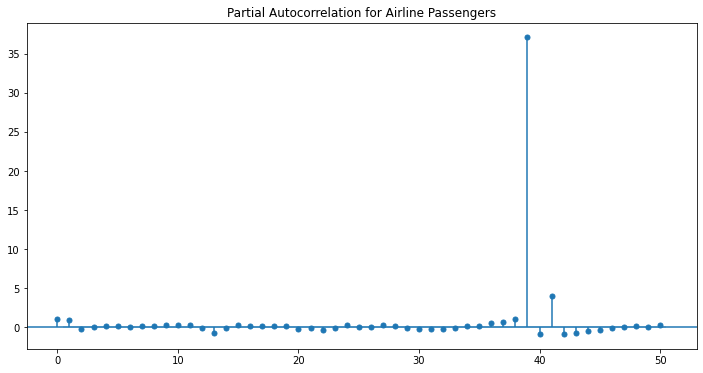

In [290]:
plot_pacf(df, lags=50, title='Partial Autocorrelation for Airline Passengers');

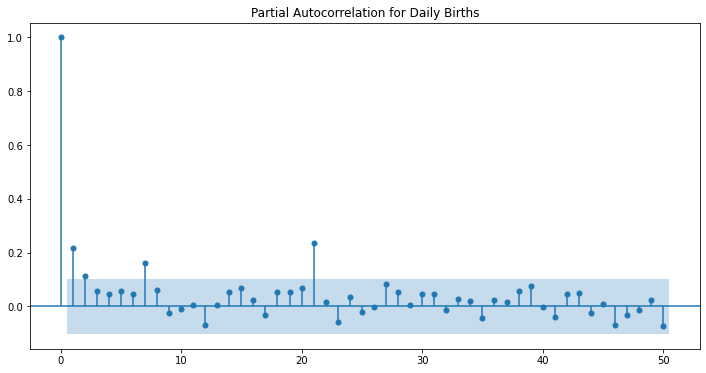

In [291]:
plot_pacf(df2, lags=50, title='Partial Autocorrelation for Daily Births');

### AutoRegression -AR Model

Build an AR model on the US population dataset.

In [292]:
df = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/uspopulation.csv', index_col=0, parse_dates=True) 
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [293]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='DATE'>

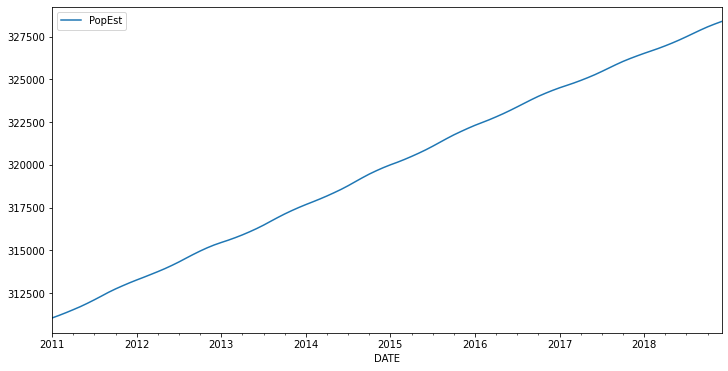

In [294]:
df.plot()

In [295]:
train, test = df.iloc[:-12], df.iloc[-12:]

Build an AR model for different lag values.

In [296]:
from statsmodels.tsa.ar_model import AR, ARResults

model = AR(train)

In [297]:
fit = model.fit(maxlag=1)

In [298]:
fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

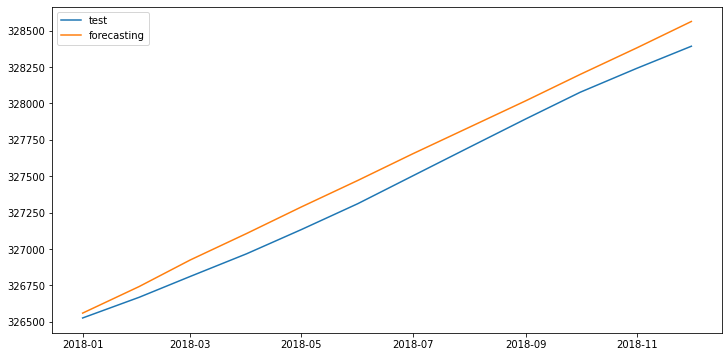

In [299]:
start = len(train)
end = len(df) -1
preds = fit.predict(start, end)

fig, ax = plt.subplots()

ax.plot(test, label='test')
ax.plot(preds, label='forecasting')
ax.legend()

Instead of inserting the maximum lag value, let the model find the optimal lag value with respect to the t-stat criterion.

In [300]:
model = AR(train)
fit = model.fit(ic='t-stat')
fit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

Plot RMSE values for p values up to 50.

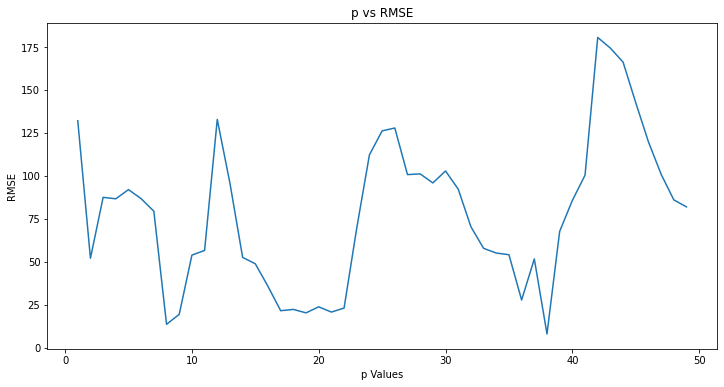

In [301]:
from sklearn.metrics import mean_squared_error

rmse_dict = {}
for i in range(1, 50):
    model = AR(train)
    fit = model.fit(maxlag=i)
    preds = fit.predict(start, end)
    rmse_dict[i] = np.sqrt(mean_squared_error(preds, test))

rmse_df = pd.DataFrame([value for id, value in rmse_dict.items()], index=[id for id, value in rmse_dict.items()])

fig, ax = plt.subplots()
ax.plot(rmse_df)

ax.set_title('p vs RMSE')
ax.set_ylabel('RMSE')
ax.set_xlabel('p Values');

Top 5 p values that give the least RMSE.

In [302]:
rmse_df.sort_values(by=0).head(5)

,0
38,8.037192
8,13.673777
9,19.423751
19,20.318768
21,20.776776


Now, forecast the US population for 2019, which is 1 year later than the end date of the dataframe.

In [303]:
model = AR(df)
fit = model.fit(ic='t-stat')
preds_future = fit.predict(start=len(df)-1, end=len(df) + 12)

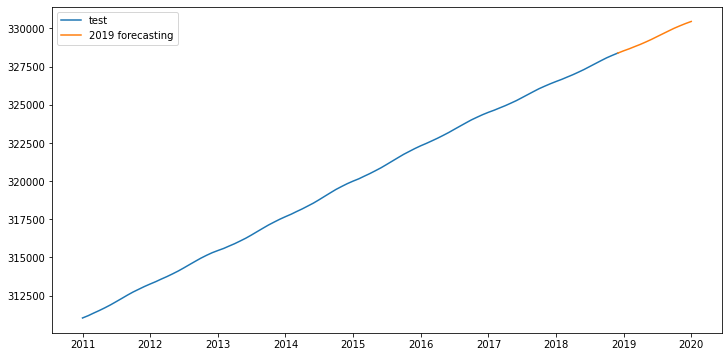

In [304]:
fig, ax = plt.subplots()

ax.plot(df, label='test')
ax.plot(preds_future, label='2019 forecasting')
ax.legend()

In [305]:
preds_future.tail(1)

2020-01-01    330459.617838
Freq: MS, dtype: float64

the US population was 329.5 million in 2020, and we get a close value although the population has already been increasing almost linearly.

###### Augmented Dickey–Fuller test

In [306]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/airline_passengers.csv', index_col=0, parse_dates=True) 
df.index.freq = 'MS'

df2 = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/DailyTotalFemaleBirths.csv', index_col=0, parse_dates=True) 
df2.index.freq = 'D'

print(adfuller(df))

(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [307]:
result_df = pd.Series(adfuller(df)[:4], index=['ADF Test Statistics', 'pvalue', 'usedlag', '# observations'])

for key, value in adfuller(df)[4].items():
    result_df[f'critical values {key}'] = value
    
result_df    

ADF Test Statistics      0.815369
pvalue                   0.991880
usedlag                 13.000000
# observations         130.000000
critical values 1%      -3.481682
critical values 5%      -2.884042
critical values 10%     -2.578770
dtype: float64

As p value is more than 0.05, we come to the conclusion that the time series is non-stationary.

###### Granger Causality Test

Test the GCT test on the following dataset.

In [308]:
df3 = pd.read_csv(r'C:/Users/Lenovo/Desktop/Data/samples.csv', index_col=0, parse_dates=True) 
df3

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


It is hard to tell without a test to say if the columns a and d have a causality to each other.

<AxesSubplot:>

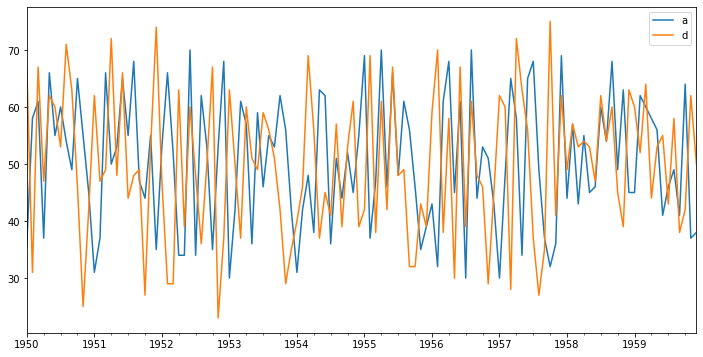

In [309]:
df3[['a', 'd']].plot()

In [310]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df3[['a', 'd']], maxlag=10)

causality_p = {}
for key, val in grangercausalitytests(df3[['a', 'd']], maxlag=10).items():
    causality_p[key] = val[0]['ssr_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=136.1258, p=0.0000  

In [311]:
causality_p

{1: 0.19420278116357173,
 2: 6.025362015680703e-45,
 3: 3.2288482941469506e-43,
 4: 4.870090857032422e-41,
 5: 6.732495822701165e-39,
 6: 5.254279556703546e-38,
 7: 3.5809573765303187e-36,
 8: 7.615912705626755e-35,
 9: 3.545118813305074e-33,
 10: 3.71644764275675e-32}

Based on the p values for different lags values, we can say that the column a can be forecasted by the column d lagged in 2 units. We can also observe this relation by plotting the shifted d column on top of the column a.

<AxesSubplot:>

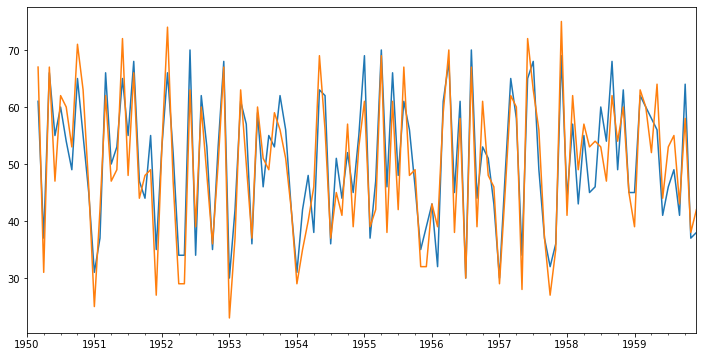

In [312]:
df3.a[2:].plot() 
df3.d.shift(2).plot() # shift the column d by 2 

###### Evaluation <br>

Find RMSE for the following randomly created dataset.

In [316]:
random_df = pd.DataFrame(np.random.randint(5, 30, (50, 2)), columns=['test', 'prediction'])
random_df.head()

,test,prediction
0,17,13
1,15,9
2,18,10
3,28,22
4,17,25


In [317]:
from statsmodels.tools.eval_measures import rmse

rmse(random_df.test, random_df.prediction)

9.837682653958705

Show how the number of passenger changes per month with their respective average values.

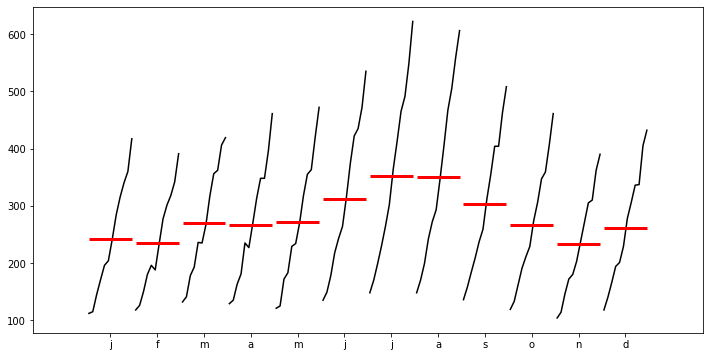

In [326]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

month_plot(df);

What month_plot() basically does is it groups the values by months and shows their ranges and averages with a red stick. Now, show a similar plot for each quarter instead.

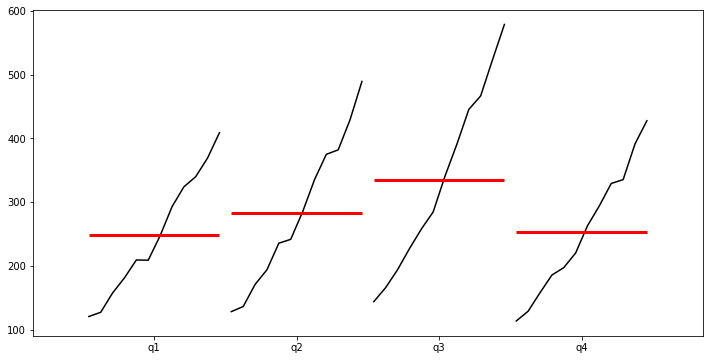

In [330]:
# resample the data to quarters
quarter_df = df.resample('Q').mean()
quarter_plot(quarter_df);

We observe that the q3 sees the most number of passengers, which aligns with our previous monthly plot.